# This Notebook describes the simulation of a pulse in the FPAsim.
## Particularly it describes the need of an oversampling of the pulse
## shape in order to simulate random time arrivals.
### L. Ravera @IRAP
### July 18, 2022

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Trise / Tfall at L for LPA2.5A pixel
taurise=52.75e-6
taufall=785.35e-6

os_factor = 16 # oversampling factor

npts=2**12
npts_os = npts * os_factor

f_frame = 183e3
f_sampling = f_frame * os_factor
t_os = np.arange(npts_os) / f_sampling

c='slategrey'
c='b'

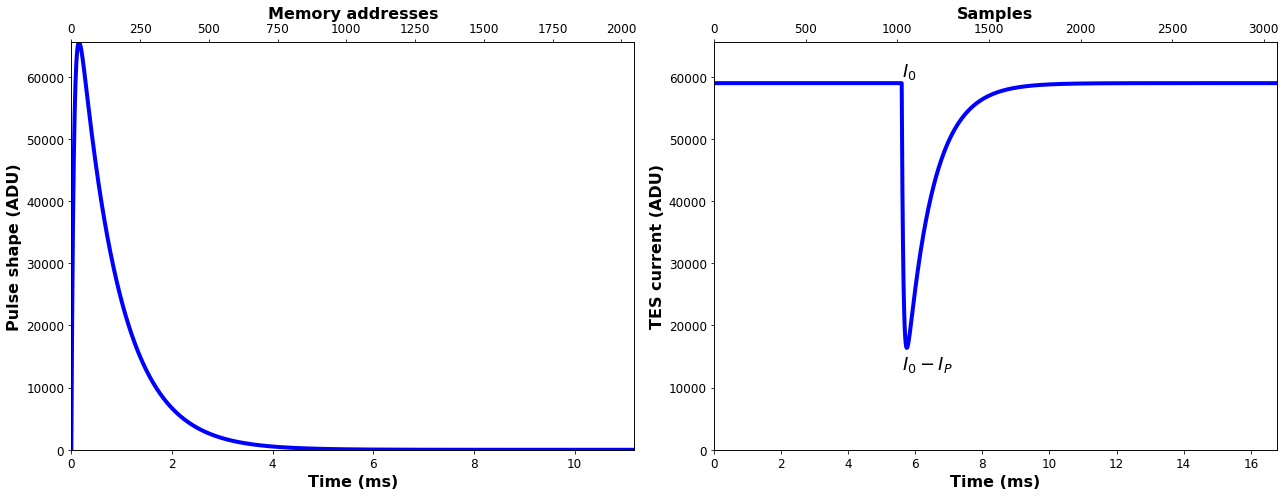

In [12]:
# Plotting the pulse shape

npts = 2048
t = np.arange(npts) / f_frame

nb_bits = 16
size = 2 ** nb_bits -1

pulse = np.zeros(len(t))
pulse += -np.exp(-t/taurise)+np.exp(-t/taufall)
pulse = pulse * size / pulse.max()

fig1=plt.figure(1,(18,7))

ax1=fig1.add_subplot(1,2,1)
ax1.plot(t*1e3, pulse, linewidth=4, color='b')
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Pulse shape (ADU)")
ax1.set_ylim([0,size])
ax1.set_xlim([0, t[-1]*1e3])
ax2 = ax1.twiny()
ax2.set_xlim(0, npts)
ax2.set_xlabel("Memory addresses")

for item in ([ax1.xaxis.label, ax1.yaxis.label, ax2.xaxis.label]):
    item.set_weight('bold')
for item in ([ax1.xaxis.label, ax1.yaxis.label, ax2.xaxis.label]):
    item.set_fontsize(16)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels()):
    item.set_fontsize(12)

# plotting the TES current
t2 = np.arange(1.5*npts) / f_frame
I0 = 0.9*size
Ip = 0.65
signal = np.append(I0*np.ones(int(0.5*npts)), I0 - Ip * pulse)

ax3=fig1.add_subplot(1,2,2)
ax3.plot(t2*1e3, signal, linewidth=4, color='b')
ax3.set_xlabel("Time (ms)")
ax3.set_ylabel("TES current (ADU)")
ax3.set_ylim([0,size])
ax3.set_xlim([0,t2[-1]*1e3])
ax4 = ax3.twiny()
ax4.set_xlim(0, 1.5*npts)
ax4.set_xlabel("Samples")

font = {
        'size': 18
        }

ax3.text(t[int(npts/2)]*1e3, I0*1.02, r"$I_0$", fontdict=font)
ax3.text(t[int(npts/2)]*1e3, I0*(1-Ip*1.2), r"$I_0-I_P$", fontdict=font)

for item in ([ax3.xaxis.label, ax3.yaxis.label, ax4.xaxis.label]):
    item.set_weight('bold')
for item in ([ax3.xaxis.label, ax3.yaxis.label, ax4.xaxis.label]):
    item.set_fontsize(16)
for item in (ax3.get_xticklabels() + ax3.get_yticklabels() + ax4.get_xticklabels()):
    item.set_fontsize(12)

fig1.tight_layout()
plt.savefig('tes_current.png', dpi=300, bbox_inches='tight')


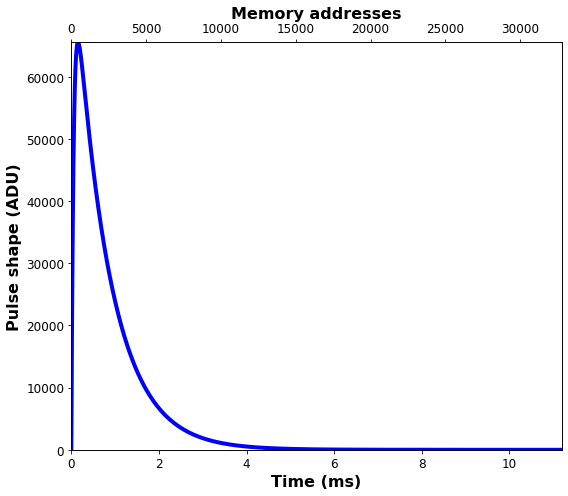

In [15]:
# Plotting the pulse shape

npts = 2048
oversamp = 16
t = np.arange(npts * oversamp) / (f_frame * oversamp)

nb_bits = 16
size = 2 ** nb_bits -1

pulse = -np.exp(-t/taurise)+np.exp(-t/taufall)
pulse = pulse * size / pulse.max()

fig1=plt.figure(1,(8,7))

ax1=fig1.add_subplot(1,1,1)
ax1.plot(t*1e3, pulse, linewidth=4, color='b')
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Pulse shape (ADU)")
ax1.set_ylim([0,size])
ax1.set_xlim([0, t[-1]*1e3])
ax2 = ax1.twiny()
ax2.set_xlim(0, len(t))
ax2.set_xlabel("Memory addresses")

for item in ([ax1.xaxis.label, ax1.yaxis.label, ax2.xaxis.label]):
    item.set_weight('bold')
for item in ([ax1.xaxis.label, ax1.yaxis.label, ax2.xaxis.label]):
    item.set_fontsize(16)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels()):
    item.set_fontsize(12)

fig1.tight_layout()
plt.savefig('tes_current.png', dpi=300, bbox_inches='tight')



# printing to a file
def to_int(x, max_x, nbits):
    return(int(2**nbits * x / max_x))

nom_fichier = "tes_response.txt"
f = open(nom_fichier, 'w')
for iline in range(len(pulse)):
    line = "{0:5d}\n".format(int(pulse[iline]))
    f.write(line)
f.close()

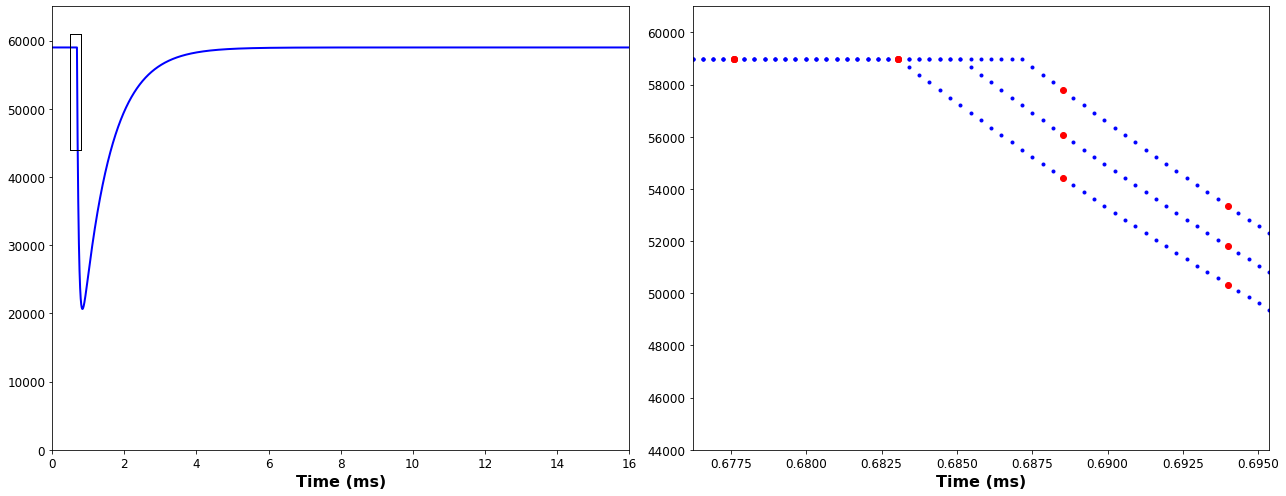

In [14]:
# Plotting the oversampling

i1=2000
pulse_os = np.zeros(len(t_os))
pulse_os[i1:]=-np.exp(-t_os[:-i1]/taurise)+np.exp(-t_os[:-i1]/taufall)
pulse_os = pulse_os / pulse_os.max()
pulse_os = I0*np.ones(len(t_os)) - I0*(Ip)*pulse_os

fig2=plt.figure(2,(18,7))

ax1=fig2.add_subplot(1,2,1)
ax1.plot(t_os*1e3, pulse_os, linewidth=2, color=c)

lw=1
x1, x2 = 0.5, 0.8
y1, y2 = 44000, 61000
ax1.plot([x1, x2], [y1, y1], 'k', linewidth=lw)
ax1.plot([x1, x2], [y2, y2], 'k', linewidth=lw)
ax1.plot([x1, x1], [y1, y2], 'k', linewidth=lw)
ax1.plot([x2, x2], [y1, y2], 'k', linewidth=lw)

ax1.set_xlabel('Time (ms)')
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 65000)

for item in ([ax1.xaxis.label, ax1.yaxis.label]):
    item.set_weight('bold')
for item in ([ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(16)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(12)


ax2=fig2.add_subplot(1,2,2)
ax2.plot(t_os*1e3, pulse_os, '.', linewidth=2, color=c)
ax2.plot(t_os[::os_factor]*1e3, pulse_os[::os_factor], 'o', linewidth=2, color='r')

ax2.plot(t_os*1e3, np.roll(pulse_os,6), '.', linewidth=2, color=c)
ax2.plot(t_os[::os_factor]*1e3, np.roll(pulse_os,6)[::os_factor], 'o', linewidth=2, color='r')

ax2.plot(t_os*1e3, np.roll(pulse_os,12), '.', linewidth=2, color=c)
ax2.plot(t_os[::os_factor]*1e3, np.roll(pulse_os,12)[::os_factor], 'o', linewidth=2, color='r')

ax2.set_xlabel('Time (ms)')

ax2.set_xlim(t_os[i1-20]*1e3, t_os[i1+36]*1e3)
ax2.set_ylim([y1, y2])

for item in ([ax2.xaxis.label, ax2.yaxis.label]):
    item.set_weight('bold')
for item in ([ax2.xaxis.label, ax2.yaxis.label]):
    item.set_fontsize(16)
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(12)

fig2.tight_layout()
plt.savefig('pulse_sim.png', dpi=300, bbox_inches='tight')
